In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [2]:
# Load Titanic dataset from the URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

/tmp/ipython-input-3-2154977317.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


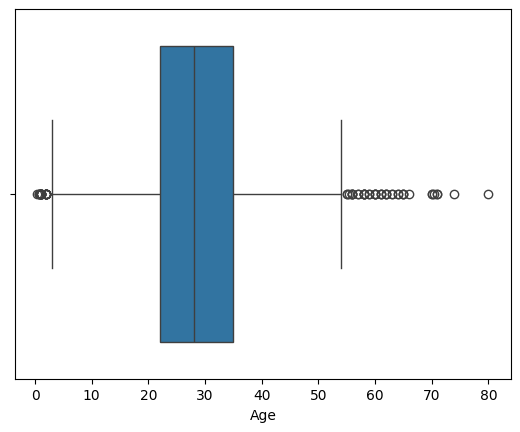

       PassengerId    Survived      Pclass           Age       SibSp  \
count   889.000000  889.000000  889.000000  8.890000e+02  889.000000   
mean    446.000000    0.382452    2.311586  4.795564e-17    0.524184   
std     256.998173    0.486260    0.834700  1.000563e+00    1.103705   
min       1.000000    0.000000    1.000000 -2.253893e+00    0.000000   
25%     224.000000    0.000000    2.000000 -5.671527e-01    0.000000   
50%     446.000000    0.000000    3.000000 -9.817932e-02    0.000000   
75%     668.000000    1.000000    3.000000  4.489563e-01    1.000000   
max     891.000000    1.000000    3.000000  2.793823e+00    8.000000   

            Parch          Fare  
count  889.000000  8.890000e+02  
mean     0.382452  1.398706e-16  
std      0.806761  1.000563e+00  
min      0.000000 -6.462044e-01  
25%      0.000000 -4.872378e-01  
50%      0.000000 -3.551972e-01  
75%      0.000000 -2.207954e-02  
max      6.000000  9.668551e+00  


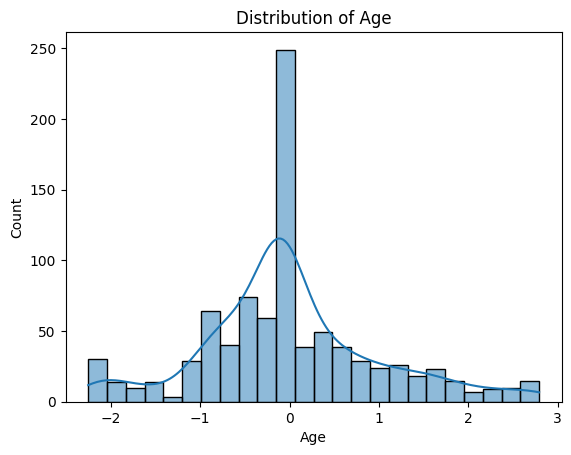

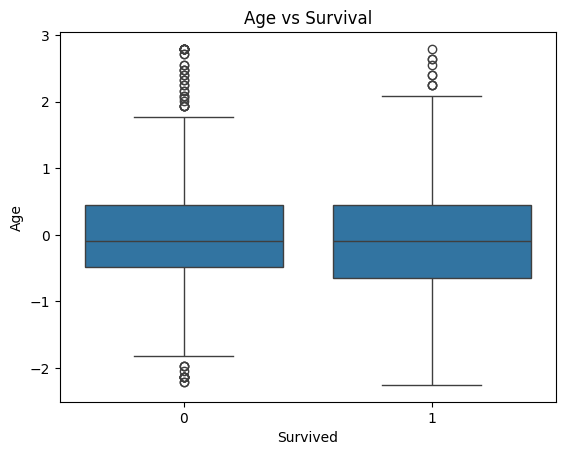

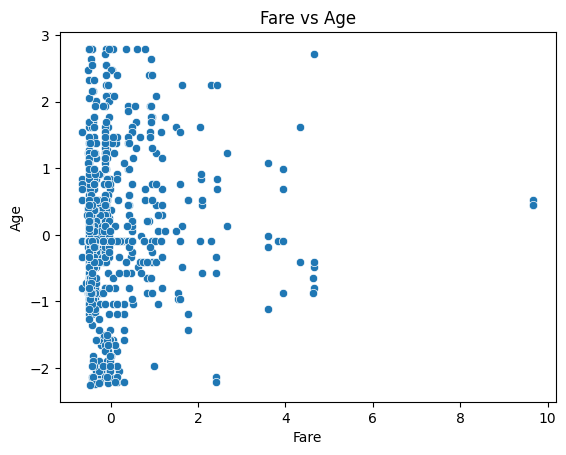

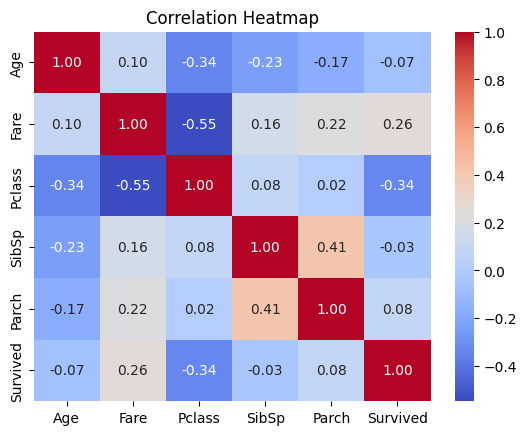

In [3]:
# Part A: Data Preprocessing & EDA

# 1. Data Preprocessing
# Checking for missing values in the dataset
data.isnull().sum()  # Check for missing values

# Fill missing 'Age' values with the median of the column
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop rows where the 'Embarked' column is missing (only 2 rows missing)
data.dropna(subset=['Embarked'], inplace=True)

# Remove duplicate rows in the dataset
data.drop_duplicates(inplace=True)

# 2. Outlier Detection and Handling
# Visualizing the distribution of 'Age' column using a boxplot
sns.boxplot(x=data['Age'])
plt.show()

# Handling outliers: capping the 'Age' column values at the 99th percentile
age_cap = data['Age'].quantile(0.99)  # Find the 99th percentile value
data.loc[data['Age'] > age_cap, 'Age'] = age_cap  # Replace values above the 99th percentile

# 3. Feature Scaling (For Linear Regression)
# Scaling 'Age' and 'Fare' columns using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# 4. Exploratory Data Analysis (EDA)
# Generate summary statistics for numerical columns
print(data.describe())

# Visualizing the distribution of 'Age' using a histogram and KDE plot
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Visualizing the relationship between 'Age' and 'Survived' using a boxplot
sns.boxplot(x=data['Survived'], y=data['Age'])
plt.title('Age vs Survival')
plt.show()

# Scatterplot showing the relationship between 'Fare' and 'Age'
sns.scatterplot(x=data['Fare'], y=data['Age'])
plt.title('Fare vs Age')
plt.show()

# Correlation heatmap between 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch', and 'Survived'
corr = data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
# Part B: Hypothesis Testing

# Hypothesis 1: Two-sample T-test - Age difference between males and females
# Null Hypothesis: No difference in mean age between males and females
# Alternative Hypothesis: There is a difference in mean age between males and females

# Extracting 'Age' for male and female passengers
male_age = data[data['Sex'] == 'male']['Age']
female_age = data[data['Sex'] == 'female']['Age']

# Perform independent two-sample T-test
t_stat, p_value = stats.ttest_ind(male_age, female_age)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Hypothesis 2: Chi-square test for Survival rate between Classes
# Null Hypothesis: No difference in survival rate between classes
# Alternative Hypothesis: There is a difference in survival rate between classes

# Create a contingency table for Pclass and Survived columns
survival_by_class = pd.crosstab(data['Pclass'], data['Survived'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(survival_by_class)
print(f'Chi2 Statistic: {chi2_stat}, P-value: {p_val}')

T-statistic: 2.521255606986286, P-value: 0.01186793352624128
Chi2 Statistic: 100.98040726128336, P-value: 1.1813624785477922e-22


In [5]:
# Part C: Linear Regression Modeling

# Simple Linear Regression: Predict 'Survived' using 'Age'
X_simple = data[['Age']]  # Independent variable (Age)
y = data['Survived']  # Dependent variable (Survived)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it on the training data
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)

# Predict the survival outcomes on the test data
y_pred_simple = simple_reg.predict(X_test)

# Model Evaluation: Calculate Mean Squared Error, Root Mean Squared Error, and R² Score
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# Multiple Linear Regression: Predict 'Survived' using 'Age', 'Fare', and 'Pclass'
X_multi = data[['Age', 'Fare', 'Pclass']]  # Independent variables
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it on the training data
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train_multi)

# Predict the survival outcomes on the test data
y_pred_multi = multi_reg.predict(X_test_multi)

# Model Evaluation: Calculate Mean Squared Error, Root Mean Squared Error, and R² Score for Multiple Regression
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Display Results for Both Models
print("Simple Linear Regression (Age vs Survived):")
print(f'MSE: {mse_simple}, RMSE: {rmse_simple}, R²: {r2_simple}')

print("\nMultiple Linear Regression (Age, Fare, Pclass vs Survived):")
print(f'MSE: {mse_multi}, RMSE: {rmse_multi}, R²: {r2_multi}')


# Regression Coefficients Interpretation
# Simple Linear Regression (Age vs Survived)
print("Simple Linear Regression Coefficients (Age vs Survived):")
print(f'Intercept: {simple_reg.intercept_}, Coefficient: {simple_reg.coef_}')

# Multiple Linear Regression (Age, Fare, Pclass vs Survived)
print("\nMultiple Linear Regression Coefficients (Age, Fare, Pclass vs Survived):")
print(f'Intercept: {multi_reg.intercept_}')
print(f'Coefficients: {multi_reg.coef_}')

# Regression Equations
# Simple Regression Equation
print(f"\nRegression Equation (Simple): Survived = {simple_reg.intercept_} + ({simple_reg.coef_[0]}) * Age")

# Multiple Regression Equation
print(f"Regression Equation (Multiple): Survived = {multi_reg.intercept_} + ({multi_reg.coef_[0]}) * Age + ({multi_reg.coef_[1]}) * Fare + ({multi_reg.coef_[2]}) * Pclass")

# Model Evaluation - R² and RMSE
print("\nSimple Linear Regression Model Evaluation:")
print(f'R²: {r2_simple}')
print(f'RMSE: {rmse_simple}')

print("\nMultiple Linear Regression Model Evaluation:")
print(f'R²: {r2_multi}')
print(f'RMSE: {rmse_multi}')

Simple Linear Regression (Age vs Survived):
MSE: 0.23488552420423905, RMSE: 0.4846498985909716, R²: 0.010488904548981659

Multiple Linear Regression (Age, Fare, Pclass vs Survived):
MSE: 0.19505880049068872, RMSE: 0.4416546167433198, R²: 0.17826844372464035
Simple Linear Regression Coefficients (Age vs Survived):
Intercept: 0.38155654132351524, Coefficient: [-0.02711928]

Multiple Linear Regression Coefficients (Age, Fare, Pclass vs Survived):
Intercept: 0.8774457268148348
Coefficients: [-0.09437684  0.03223999 -0.21311291]

Regression Equation (Simple): Survived = 0.38155654132351524 + (-0.02711927554706046) * Age
Regression Equation (Multiple): Survived = 0.8774457268148348 + (-0.09437683783950689) * Age + (0.03223998699261532) * Fare + (-0.21311290693498783) * Pclass

Simple Linear Regression Model Evaluation:
R²: 0.010488904548981659
RMSE: 0.4846498985909716

Multiple Linear Regression Model Evaluation:
R²: 0.17826844372464035
RMSE: 0.4416546167433198


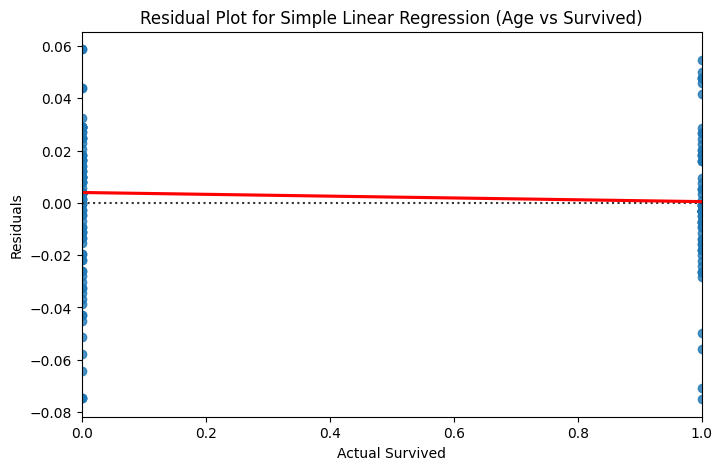

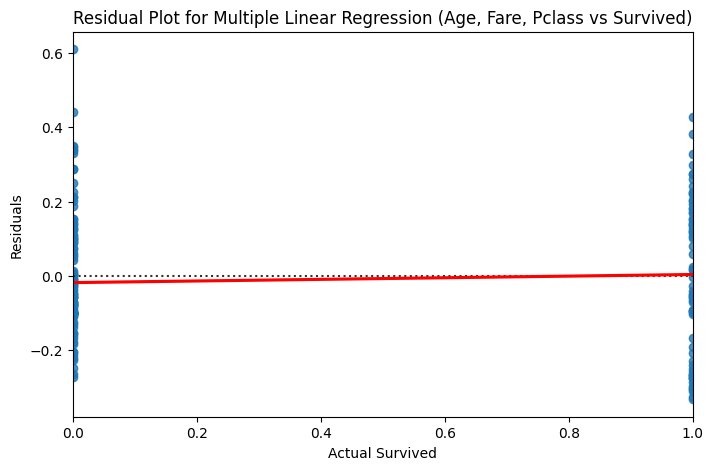

In [6]:
# Residual Plots
# Simple Linear Regression Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred_simple, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Simple Linear Regression (Age vs Survived)')
plt.xlabel('Actual Survived')
plt.ylabel('Residuals')
plt.show()

# Multiple Linear Regression Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test_multi, y=y_pred_multi, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Multiple Linear Regression (Age, Fare, Pclass vs Survived)')
plt.xlabel('Actual Survived')
plt.ylabel('Residuals')
plt.show()